In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

Data pre-processing

In [2]:
data = pd.read_csv('/content/train_loan_preprocess.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.size

7982

In [4]:
data.shape

(614, 13)

In [5]:
data.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Filling and replacing nullvalues**

In [9]:
data['Gender'].fillna(method='ffill',inplace=True)
data['Self_Employed'].fillna(method='ffill',inplace=True)
data['Married'].fillna(method='bfill',inplace=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


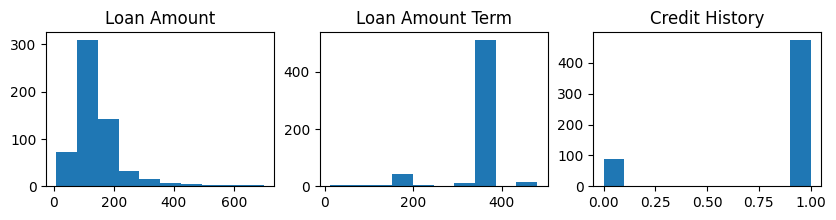

In [10]:
fig,ax=plt.subplots(1,3,figsize=(10,2))

ax[0].hist(data['LoanAmount'])
ax[0].set_title('Loan Amount')

ax[1].hist(data['Loan_Amount_Term'])
ax[1].set_title('Loan Amount Term')

ax[2].hist(data['Credit_History'])
ax[2].set_title('Credit History')

plt.show()

In [11]:
la_med = data['LoanAmount'].median()
print(la_med)

128.0


In [12]:
replacevals = {'Dependents':1,'LoanAmount':la_med,'Loan_Amount_Term':360,'Credit_History':0}
data.fillna(value=replacevals,inplace=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Boxplots after filling and replacing nullvalues (to find and remove outliers)**

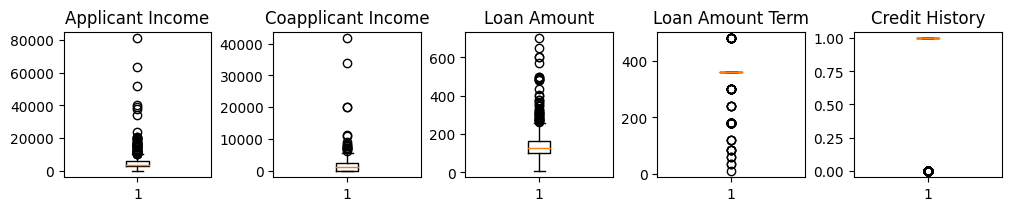

In [14]:
fig,ax=plt.subplots(1,5,figsize=(10,2),constrained_layout=True)

ax[0].boxplot(data['ApplicantIncome'])
ax[0].set_title('Applicant Income')

ax[1].boxplot(data['CoapplicantIncome'])
ax[1].set_title('Coapplicant Income')

ax[2].boxplot(data['LoanAmount'])
ax[2].set_title('Loan Amount')

ax[3].boxplot(data['Loan_Amount_Term'])
ax[3].set_title('Loan Amount Term')

ax[4].boxplot(data['Credit_History'])
ax[4].set_title('Credit History')

plt.show()

In [15]:
ai_Q1 = np.percentile(data['ApplicantIncome'],25, interpolation='midpoint')
ai_Q2 = np.percentile(data['ApplicantIncome'],50, interpolation='midpoint')
ai_Q3 = np.percentile(data['ApplicantIncome'],75, interpolation='midpoint')
ai_IQR = ai_Q3 - ai_Q1
print(ai_Q1,ai_Q2,ai_Q3)
print(ai_IQR)

2879.0 3812.5 5790.0
2911.0


In [16]:
ai_min_vl = ai_Q1 - 1.5 * ai_IQR
ai_max_vl = ai_Q3 + 1.5 * ai_IQR
print(ai_min_vl,ai_max_vl)

-1487.5 10156.5


In [17]:
outliers_ai = []
for x in data['ApplicantIncome']:
    if x < ai_min_vl or x > ai_max_vl:
        outliers_ai.append(x)
outliers_ai

[12841,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 39999,
 51763,
 33846,
 39147,
 12000,
 11000,
 16250,
 14683,
 11146,
 14583,
 20667,
 20233,
 15000,
 63337,
 19730,
 15759,
 81000,
 14880,
 12876,
 10416,
 37719,
 16692,
 16525,
 16667,
 10833,
 18333,
 17263,
 20833,
 13262,
 17500,
 11250,
 18165,
 19484,
 16666,
 16120,
 12000]

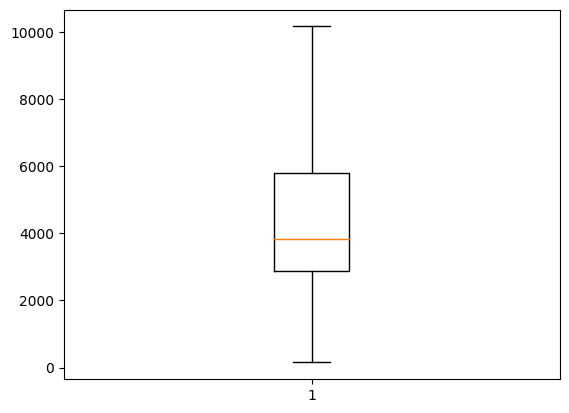

In [18]:
data['ApplicantIncome'] = data['ApplicantIncome'].clip(ai_min_vl,ai_max_vl)
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [19]:
ci_Q1 = np.percentile(data['CoapplicantIncome'],25, interpolation='midpoint')
ci_Q2 = np.percentile(data['CoapplicantIncome'],50, interpolation='midpoint')
ci_Q3 = np.percentile(data['CoapplicantIncome'],75, interpolation='midpoint')
ci_IQR = ci_Q3 - ci_Q1
print(ci_Q1,ci_Q2,ci_Q3)
print(ci_IQR)

0.0 1188.5 2292.5
2292.5


In [20]:
ci_min_vl = ci_Q1 - 1.5 * ci_IQR
ci_max_vl = ci_Q3 + 1.5 * ci_IQR
print(ci_min_vl,ci_max_vl)

-3438.75 5731.25


In [21]:
outliers_ci = []
for x in data['CoapplicantIncome']:
    if x < ci_min_vl or x > ci_max_vl:
        outliers_ci.append(x)
outliers_ci

[10968.0,
 8106.0,
 7210.0,
 8980.0,
 7750.0,
 11300.0,
 7250.0,
 7101.0,
 6250.0,
 7873.0,
 20000.0,
 20000.0,
 8333.0,
 6667.0,
 6666.0,
 7166.0,
 33837.0,
 41667.0]

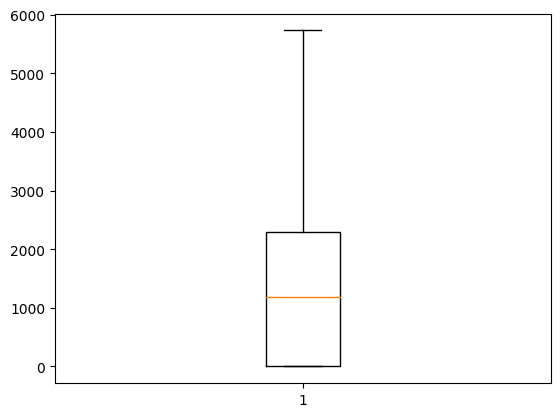

In [22]:
data['CoapplicantIncome'] = data['CoapplicantIncome'].clip(ci_min_vl,ci_max_vl)
plt.boxplot(data['CoapplicantIncome'])
plt.show()

In [23]:
la_Q1 = np.percentile(data['LoanAmount'],25, interpolation='midpoint')
la_Q2 = np.percentile(data['LoanAmount'],50, interpolation='midpoint')
la_Q3 = np.percentile(data['LoanAmount'],75, interpolation='midpoint')
la_IQR = la_Q3 - la_Q1
print(la_Q1,la_Q2,la_Q3)
print(la_IQR)

100.5 128.0 164.5
64.0


In [24]:
la_min_vl = la_Q1 - 1.5 * la_IQR
la_max_vl = la_Q3 + 1.5 * la_IQR
print(la_min_vl,la_max_vl)

4.5 260.5


In [25]:
outliers_la = []
for x in data['LoanAmount']:
    if x < la_min_vl or x > la_max_vl:
        outliers_la.append(x)
outliers_la

[267.0,
 349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 265.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

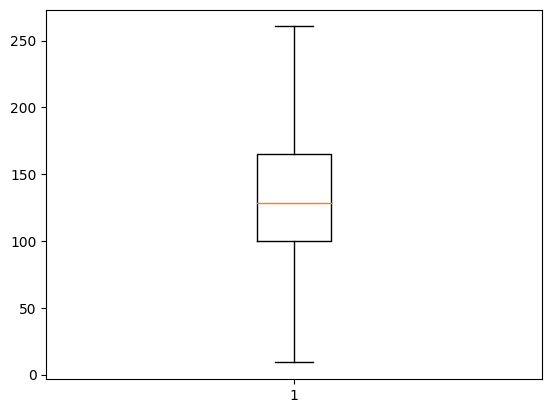

In [26]:
data['LoanAmount'] = data['LoanAmount'].clip(la_min_vl,la_max_vl)
plt.boxplot(data['LoanAmount'])
plt.show()

In [27]:
lt_Q1 = np.percentile(data['Loan_Amount_Term'],25, interpolation='midpoint')
lt_Q2 = np.percentile(data['Loan_Amount_Term'],50, interpolation='midpoint')
lt_Q3 = np.percentile(data['Loan_Amount_Term'],75, interpolation='midpoint')
lt_IQR = lt_Q3 - lt_Q1
print(lt_Q1,lt_Q2,lt_Q3)
print(lt_IQR)

360.0 360.0 360.0
0.0


In [28]:
lt_min_vl = lt_Q1 - 1.5 * lt_IQR
lt_max_vl = lt_Q3 + 1.5 * lt_IQR
print(lt_min_vl,lt_max_vl)

360.0 360.0


In [29]:
outliers_lt = []
for x in data['Loan_Amount_Term']:
    if x < lt_min_vl or x > lt_max_vl:
        outliers_lt.append(x)
outliers_lt

[120.0,
 240.0,
 180.0,
 180.0,
 60.0,
 300.0,
 480.0,
 300.0,
 240.0,
 180.0,
 120.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 480.0,
 120.0,
 180.0,
 180.0,
 180.0,
 180.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 60.0,
 180.0,
 180.0,
 480.0,
 180.0,
 36.0,
 180.0,
 300.0,
 480.0,
 480.0,
 84.0,
 180.0,
 180.0,
 180.0,
 180.0,
 480.0,
 300.0,
 480.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 180.0,
 300.0,
 300.0,
 180.0,
 240.0,
 300.0,
 300.0,
 180.0,
 180.0,
 180.0,
 180.0,
 300.0,
 84.0,
 12.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 180.0,
 36.0,
 180.0,
 480.0,
 84.0,
 84.0,
 180.0,
 240.0,
 180.0,
 180.0,
 180.0,
 180.0]

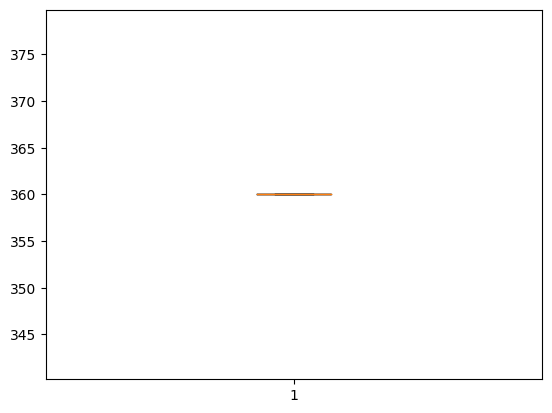

In [30]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].clip(lt_min_vl,lt_max_vl)
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

In [31]:
ch_Q1 = np.percentile(data['Credit_History'],25, interpolation='midpoint')
ch_Q2 = np.percentile(data['Credit_History'],50, interpolation='midpoint')
ch_Q3 = np.percentile(data['Credit_History'],75, interpolation='midpoint')
ch_IQR = ch_Q3 - ch_Q1
print(ch_Q1,ch_Q2,ch_Q3)
print(ch_IQR)

1.0 1.0 1.0
0.0


In [32]:
ch_min_vl = ch_Q1 - 1.5 * ch_IQR
ch_max_vl = ch_Q3 + 1.5 * ch_IQR
print(ch_min_vl,ch_max_vl)

1.0 1.0


In [33]:
outliers_ch = []
for x in data['Credit_History']:
    if x < ch_min_vl or x > ch_max_vl:
        outliers_ch.append(x)
outliers_ch

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

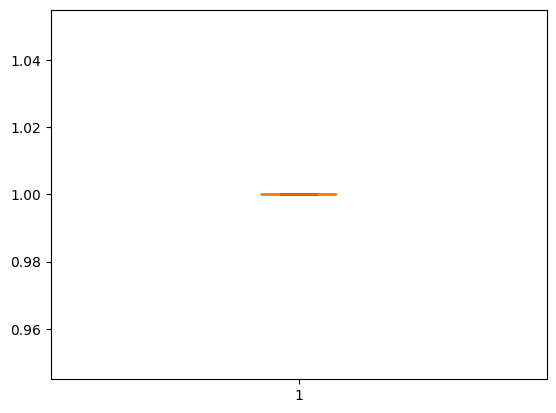

In [34]:
data['Credit_History'] = data['Credit_History'].clip(ch_min_vl,ch_max_vl)
plt.boxplot(data['Credit_History'])
plt.show()

**Boxplots after removing outliers**

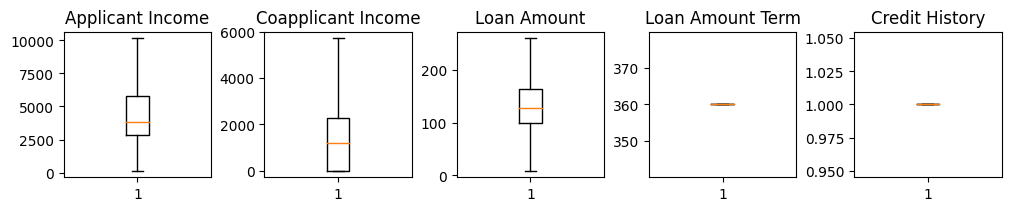

In [35]:
fig,ax=plt.subplots(1,5,figsize=(10,2),constrained_layout=True)

ax[0].boxplot(data['ApplicantIncome'])
ax[0].set_title('Applicant Income')

ax[1].boxplot(data['CoapplicantIncome'])
ax[1].set_title('Coapplicant Income')

ax[2].boxplot(data['LoanAmount'])
ax[2].set_title('Loan Amount')

ax[3].boxplot(data['Loan_Amount_Term'])
ax[3].set_title('Loan Amount Term')

ax[4].boxplot(data['Credit_History'])
ax[4].set_title('Credit History')

plt.show()

**Encoding and Scaling**

In [36]:
data
data1=data.copy()

In [37]:
label_encoder = LabelEncoder()
data['LoanID_enc'] = label_encoder.fit_transform(data['Loan_ID'])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanID_enc
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y,0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,2
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,3
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y,609
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y,610
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y,611
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y,612


In [38]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [39]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(data[['Property_Area']])
one_hot_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [40]:
one_hot_data = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Property_Area']))
data = pd.concat([data, one_hot_data], axis=1)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanID_enc,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y,0,0.0,0.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,1,1.0,0.0,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,2,0.0,0.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,3,0.0,0.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,4,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y,609,1.0,0.0,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y,610,1.0,0.0,0.0
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y,611,0.0,0.0,1.0
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y,612,0.0,0.0,1.0


In [41]:
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [42]:
data1_encoded = pd.get_dummies(data1, columns=['Property_Area'],dtype=int, prefix='p')
data1_encoded

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,p_Rural,p_Semiurban,p_Urban
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Y,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,N,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Y,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Y,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Y,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Y,1,0,0
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Y,1,0,0
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Y,0,0,1
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Y,0,0,1


In [43]:
ord_encoder = OrdinalEncoder()
data1['Property_Area_encoded'] = ord_encoder.fit_transform(data1[['Property_Area']])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_encoded
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y,2.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,2.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,2.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y,0.0
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y,2.0
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y,2.0


In [44]:
std_scaler = StandardScaler()
data1['LoanAmount_scaled'] = std_scaler.fit_transform(data1[['LoanAmount']])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_encoded,LoanAmount_scaled
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y,2.0,-0.167288
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,0.0,-0.167288
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,2.0,-1.282678
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,2.0,-0.311209
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,2.0,0.066584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y,0.0,-1.192727
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y,0.0,-1.750422
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y,2.0,2.081482
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y,2.0,0.894131


In [45]:
minmax_scaler = MinMaxScaler()
data1['LoanAmount_minscaled'] = minmax_scaler.fit_transform(data1[['LoanAmount']])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_encoded,LoanAmount_scaled,LoanAmount_minscaled
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y,2.0,-0.167288,0.473161
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,0.0,-0.167288,0.473161
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,2.0,-1.282678,0.226640
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,2.0,-0.311209,0.441352
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,2.0,0.066584,0.524851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y,0.0,-1.192727,0.246521
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y,0.0,-1.750422,0.123260
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y,2.0,2.081482,0.970179
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y,2.0,0.894131,0.707753


In [46]:
minmax_scaler = MinMaxScaler()
scale_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
data2 = data1.copy()
data2 = data2.drop(columns=['Loan_ID', 'Gender', 'Married', 'Dependents',  'Education',   'Self_Employed', 'Loan_Amount_Term',	'Credit_History', 'Property_Area', 'Loan_Status', 'Property_Area_encoded', 'LoanAmount_scaled', 'LoanAmount_minscaled'])
for col in scale_columns:
    data2[col] = minmax_scaler.fit_transform(data2[[col]])
data2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.569530,0.000000,0.473161
1,0.443012,0.263119,0.473161
2,0.284815,0.000000,0.226640
3,0.243142,0.411429,0.441352
4,0.584620,0.000000,0.524851


In [47]:
corr_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
corr_matrix = data2[corr_columns].corr()
corr_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.229124,0.557597
CoapplicantIncome,-0.229124,1.000000,0.264989
LoanAmount,0.557597,0.264989,1.000000


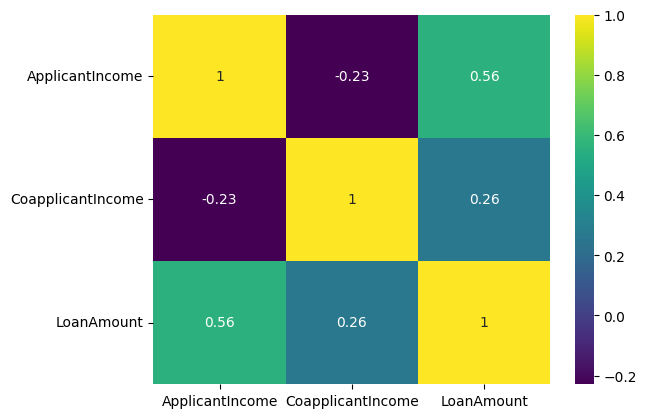

In [49]:
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

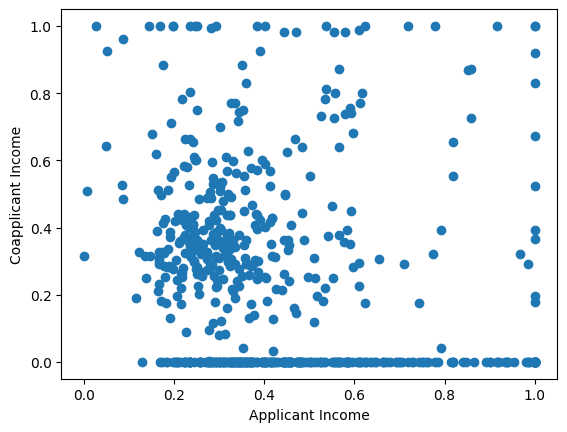

In [50]:
plt.scatter(data2['ApplicantIncome'], data2['CoapplicantIncome'])
plt.xlabel('Applicant Income')
plt.ylabel('Coapplicant Income')
plt.show()